# Одномерная оптимизация (10 баллов)

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

В данном домашнем задании рассмотриваются несколько базовых подходов одномерной оптимизации, не использующих знания о градиенте функции. Для его выполнения потребуется следующее определение:

__Определение.__ Одномерная функция $f: [a, b] \to \mathbb{R}$ называется _унимодальной_ на $[a, b]$, если существует $c^{*} \in [a, b]$ такое, что:

1. Для произвольных $x, y \in [a, c^{*}]$, таких что $x < y$, выполнено $f(x) > f(y)$;

2. Для произвольных $x, y \in [c^{*}, b]$, таких что $x < y$, выполнено $f(x) < f(y)$.

Говоря менее формально, мы рассматриваем функции на отрезке, которые строго убывают слева от минимума и строго возрастают справа от него. Из определения незамедлительно следует, что минимум на отрезке $[a, b]$ единственен.

Описание метода __дихотомии__ (бисекции) для поиска минимума унимодальных функций:

1. __Инициализация:__

1.1. Задается унимодальная функция $f(x)$, которая имеет единственный минимум на интервале $[a,b]$.

1.2. Задается начальный интервал $[a,b]$, на котором ищется минимум.

1.3. Задается параметр $\varepsilon$ — точность, с которой нужно найти минимум.

2. __Итеративный шаг метода:__

2.1. Интервал $[a,b]$ делится пополам, и вычисляется середина интервала:

$$c = \frac{a + b}{2}$$

2.2. Выбираются две точки $x_1$ и $x_2$, близкие к середине интервала $c$, но не совпадающие с ней:

$$x_{1} = c - \delta, \quad x_{2} = c + \delta,$$

где $\delta$ небольшое положительное число, обычно $\delta \ll \varepsilon$, поэтому возьмите $\delta = \frac{\varepsilon}{10}$.

2.3. Вычисляются значения функции в точках $x_1$ и $x_2$:

$\bullet$ Если $f(x_{1}) < f(x_{2})$, то минимум находится на отрезке $[a, x_{2}]$, поэтому зона поиска оптимума сужается до $[a, x_2]$.

$\bullet$ Если $f(x_{1}) > f(x_{2})$, то минимум находится на отрезке $[x_{1}, b]$, поэтому зона поиска оптимума сужается до $[x_1, b]$.

$\bullet$ Если $f(x_{1}) = f(x_{2})$, то минимум находится на отрезке $[x_{1}, x_{2}]$, поэтому зона поиска оптимума сужается до $[a, x_{2}]$ или $[x_1, b]$.

3. __Проверка точности:__

$\bullet$ Если длина нового интервала меньше заданной точности $\varepsilon$, то процесс завершается и возвращается значение $c_{\text{out}}$ ($c$ с последней итерации).

$\bullet$ Если длина нового интервала больше заданной точности $\varepsilon$, то повторяется шаг 2 для нового интервала.

__а) (0.5 балла)__ Докажите, что данный алгоритм находит минимум унимодальной функции на отрезке $[a, b]$ с точностью $\varepsilon$ . 

**Сужение интервала:** На каждой итерации длина интервала сокращается примерно в 2 раза. Точнее, новая длина интервала $l_{k+1}$ = $(l_k + 2δ)/2$, где $l_k$ = $b_k$ - $a_k$.

**Сохранение минимума внутри интервала:** Следует из унимодальности функции. Достатоно рассмотреть 3 перехода выше и понять, что при каждом из них минимум сохраняет свое положение.

**Точность решения:** Когда алгоритм завершается, точка $c_{out}$ отличается от истинного минимума не более чем на ε, так как длина последнего интервала меньше ε, и $c^*$ находится внутри этого интервала. Следовательно, |$c_{out}$ - $c^*$| < $ε$.

__б) (0.5 балла)__ Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{\text{out}} - c^*| \leq \varepsilon$)?

Необходимо получить верхнюю оценку на число итераций и подсчета значений $f$ метода дихотомии для минимизации унимодальных функций.

__Замечание__. Величиной $\delta$ надо пренебречь.

**Итерационная сложность:**

На каждой итерации длина интервала уменьшается примерно в 2 раза (пренебрегаем $\delta$). Обозначим начальную длину интервала как $L = b - a$.

После k итераций длина интервала составит примерно: $L_k = L / 2^k$

Чтобы достичь точности $\varepsilon$, нужно, чтобы $L_k < \varepsilon$, то есть: $L / 2^k < \varepsilon$

Отсюда:

$2^k > L / \varepsilon$

$k > log_2(L / \varepsilon)$

Таким образом, для достижения точности $\varepsilon$ требуется $O(log(L/\varepsilon))$ итераций.

**Оракульная сложность:**

На каждой итерации вычисляется значение функции f в двух точках.

Следовательно, если требуется k итераций для достижения точности $\varepsilon$, то общее число вычислений функции (оракульная сложность) составит $2k = O(log(L/\varepsilon))$.

**Итоговая оценка сложности:**

- Итерационная сложность: $O(log(L/ε))$
- Оракульная сложность: $O(log(L/ε))$

__в) (1 балл)__ Придумайте свою унимодальную функцию на отрезке. 

1. Покажите, что она является унимодальной на этом отрезке (аналитически).

2. Найдите $c^{*}$ (аналитически).

3. Нарисуйте график функции.

Рассмотрим функцию: 
$f(x) = (x - 3)^2 + 1$ на отрезке [1, 6]

**1. Доказательство унимодальности**

Для доказательства унимодальности функции $f(x) = (x - 3)^2 + 1$ на отрезке $[1, 6]$, найдем её производную: $f'(x) = 2(x - 3)$

Видим, что:
- На $[1, 3)$: $f'(x) < 0$, значит функция строго убывает
- При $x = 3$: $f'(x) = 0$, значит это точка минимума
- На $(3, 6]$: $f'(x) > 0$, значит функция строго возрастает


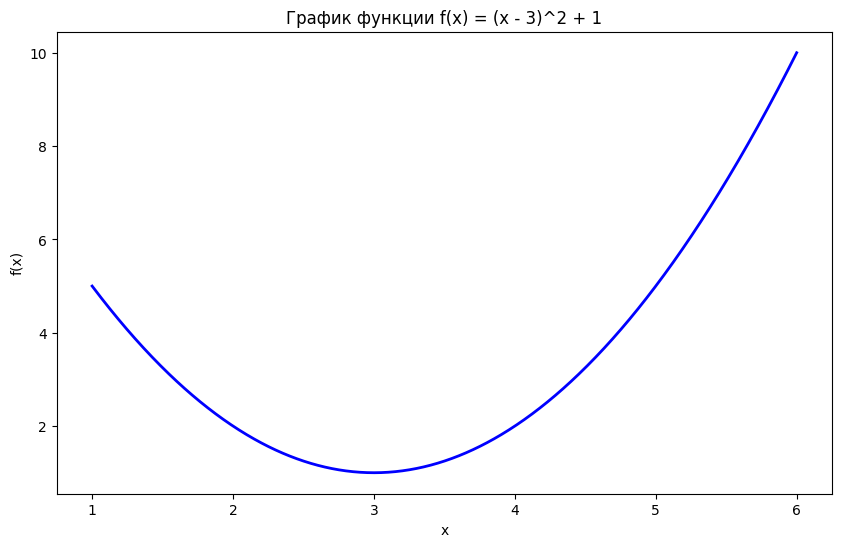

In [157]:
def f(x):
    return (x - 3)**2 + 1

x = np.linspace(1, 6, 1000)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)

plt.title('График функции f(x) = (x - 3)^2 + 1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

__г) (1.5 балла)__ Реализуйте метод дихотомии.

In [148]:
def dichotomy_method(f, a, b, c_star, max_iter=100, epsilon=1e-6, **params):
    """
    Метод дихотомии для поиска минимума унимодальной функции на интервале [a, b].

    Параметры:
        f (callable): Унимодальная функция, минимум которой ищется.
        a (float): Левая граница интервала поиска.
        b (float): Правая граница интервала поиска.
        c_star (float): Истинное значение точки минимума (для сравнения).
        max_iter (int, optional): Максимальное количество итераций. По умолчанию 100.
        epsilon (float, optional): Точность поиска. 
            Поиск завершается, когда длина интервала становится меньше epsilon. По умолчанию 1e-6.
        **params: Именованные гиперпараметры метода.
            params['delta'] - значение гиперпараметра для поиска точек x1 и x2.

    Возвращает:
        c (float): Приближенное значение точки минимума.
        history (list): Список значений |c - c_star| на каждой итерации.
    """
    
    if a >= b:
        raise ValueError("Левая граница интервала a должна быть меньше правой границы b.")
    if epsilon <= 0:
        raise ValueError("Точность epsilon должна быть положительной.")
        
    history = []

    delta = params.get('delta', epsilon / 10)
    left, right = a, b
    for _ in range(max_iter):
        if right - left < epsilon:
            break
        
        c = (left + right) / 2
        x1 = c - delta
        x2 = c + delta
        f_x1 = f(x1)
        f_x2 = f(x2)
        
        if f_x1 < f_x2:
            right = x2
        elif f_x1 > f_x2:
            left = x1
        else:
            left, right = x1, x2
        
        c_current = (left + right) / 2
        history.append(abs(c_current - c_star))
    
    c_out = (left + right) / 2
    return c_out, history

Постройте сравнительный график зависимости точности метода $|c_{\text{out}} - c^*|$ и теоретической оценки от числа итераций. Значение $\delta$ выберите равным $10^{-8} \cdot (b - a)$. График должен соответствовать следующим критериям:

1. Размер должен быть удобен для чтения
2. Масштаб осей (обычный или логарифмический)
3. Подписи осей 
4. Легенда (так как на графике несколько линий)
5. Толщина/цвет/сетка (на ваше усмотрение, но должно быть читаемо)

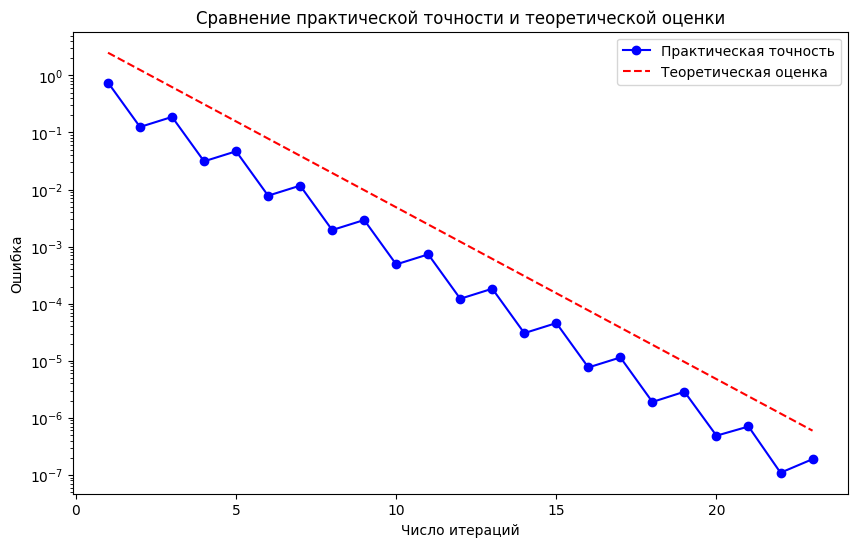

In [149]:
a, b = 1, 6
c_star = 3
max_iter = 100
epsilon = 1e-6
delta = 1e-8 * (b - a)

c_out, history = dichotomy_method(f, a, b, c_star, max_iter, epsilon, delta=delta)
theoretical = [(b - a) / (2**(i+1)) for i in range(len(history))]

plt.figure(figsize=(10, 6))
plt.semilogy(range(1, len(history) + 1), history, 'b-o', label='Практическая точность')
plt.semilogy(range(1, len(theoretical) + 1), theoretical, 'r--', label='Теоретическая оценка')
plt.xlabel('Число итераций')
plt.ylabel('Ошибка')
plt.title('Сравнение практической точности и теоретической оценки')
plt.legend()
plt.show()

__д) (1 балл)__ Теперь сравним работу метода при разных значениях гиперпараметра $\delta$. Предлагается рассмотреть следующие значения:
1. $\delta = 10^{-12} \cdot (b - a)$;
2. $\delta = 10^{-9} \cdot (b - a)$;
3. $\delta = 10^{-6} \cdot (b - a)$;
4. $\delta = 10^{-3} \cdot (b - a)$;
5. $\delta = 10^{-1} \cdot (b - a)$.

Постройте сравнительный график зависимости критерия от номера итерации.

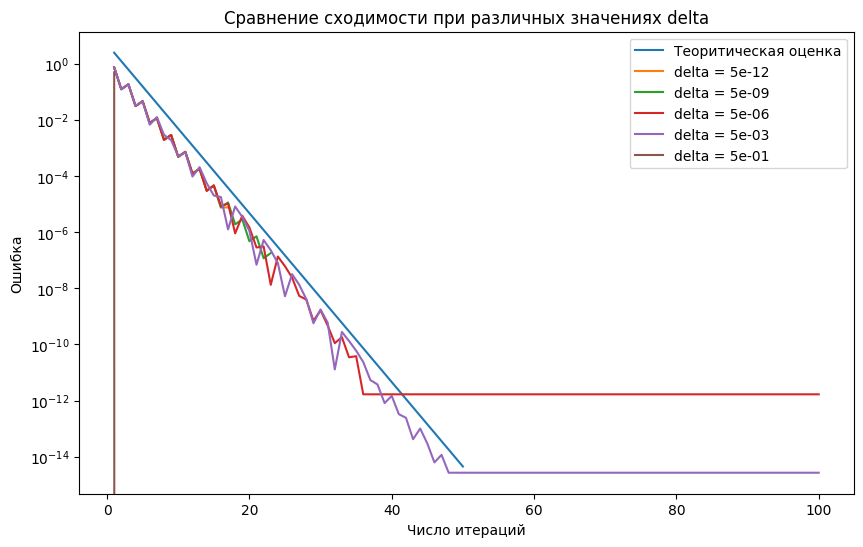

In [150]:
delta_values = [
    1e-12 * (b - a),
    1e-9 * (b - a),
    1e-6 * (b - a),
    1e-3 * (b - a),
    1e-1 * (b - a)
]

results = {}
results["Теоритическая оценка"] = [(b - a) / (2**(i+1)) for i in range(50)]
for delta in delta_values:
    c_out, history = dichotomy_method(f, a, b, c_star, max_iter, epsilon, delta=delta)
    results[f"delta = {delta:.0e}"] = history

plt.figure(figsize=(10, 6))

for label, history in results.items():
    plt.semilogy(range(1, len(history) + 1), history, linestyle='-', label=label)

plt.xlabel('Число итераций')
plt.ylabel('Ошибка')
plt.title('Сравнение сходимости при различных значениях delta')
plt.legend()
plt.show()

Что можно сказать о зависимости сходимости от значения параметра $\delta$? Объясните, почему для малых значений наблюдается плохая сходимость. Для какого значения наблюдается наилучшая сходимость?

При слишком маленьких значениях $\delta$ могут возникать численные ошибки округления.

При слишком больших значениях $\delta$ алгоритм просто не продолжает сужать отрезок, так как дельта больше, чем отрезок на какой-то итерации.

Таким образом, оптимальная сходимость достигается при средних значениях $\delta$.

Лучше всего использовать $\delta = 10^{-9} \cdot (b - a)$.

__e) (2 балла)__ До этого использовался подход с использованием постоянной величины $\delta$. Рассмотрим адаптивный подход, а именно - на каждой итерации значения $\delta$ будет определяться через длину интервала $l_k$, полученную на $k$-ой итерации. Предлагается рассмотреть следующие значения:

1. $\delta = 10^{-6} \cdot l_k$;
2. $\delta = 10^{-3} \cdot l_k$;
3. $\delta = 10^{-1} \cdot l_k$;
4. $\delta = 6^{-1} \cdot l_k$.

Последняя модификация также называется __тернарным__ поиском, при которой отрезок делится на 3 части на каждой итерации.

Постройте сравнительный график сходимости значения критерия от различных значений $\delta$. Также добавьте на график сходимость с наилучшим постоянным значением $\delta$, полученном в предыдущем пункте.

In [151]:
def dichotomy_adaptive(f, a, b, c_star, max_iter=100, epsilon=1e-6, **params):
    """
    Метод дихотомии для поиска минимума унимодальной функции на интервале [a, b].

    Параметры:
        f (callable): Унимодальная функция, минимум которой ищется.
        a (float): Левая граница интервала поиска.
        b (float): Правая граница интервала поиска.
        c_star (float): Истинное значение точки минимума (для сравнения).
        max_iter (int, optional): Максимальное количество итераций. По умолчанию 100.
        epsilon (float, optional): Точность поиска. 
            Поиск завершается, когда длина интервала становится меньше epsilon. По умолчанию 1e-6.
        **params: Именованные гиперпараметры метода.
            params['delta'](a, b) - функция, возвращающая значение интервала на k-ой итерации.

    Возвращает:
        c (float): Приближенное значение точки минимума.
        history (list): Список значений |c - c_star| на каждой итерации.
    """
    
    if a >= b:
        raise ValueError("Левая граница интервала a должна быть меньше правой границы b.")
    if epsilon <= 0:
        raise ValueError("Точность epsilon должна быть положительной.")
        
    history = []

    delta_func = params.get('delta')
    if delta_func is None:
        raise ValueError("Необходимо предоставить функцию 'delta' в параметрах.")
    
    left, right = a, b
    for _ in range(max_iter):
        if right - left < epsilon:
            break
        
        c = (left + right) / 2
        delta = delta_func(left, right)
        x1 = c - delta
        x2 = c + delta
        x1 = max(left, x1)
        x2 = min(right, x2)
        f_x1 = f(x1)
        f_x2 = f(x2)
        
        if f_x1 < f_x2:
            right = x2
        elif f_x1 > f_x2:
            left = x1
        else:
            left, right = x1, x2
        
        c_current = (left + right) / 2
        history.append(abs(c_current - c_star))
    
    c_out = (left + right) / 2
    return c_out, history

Помогает ли использование адаптивного подхода в достижении лучшей сходимости?

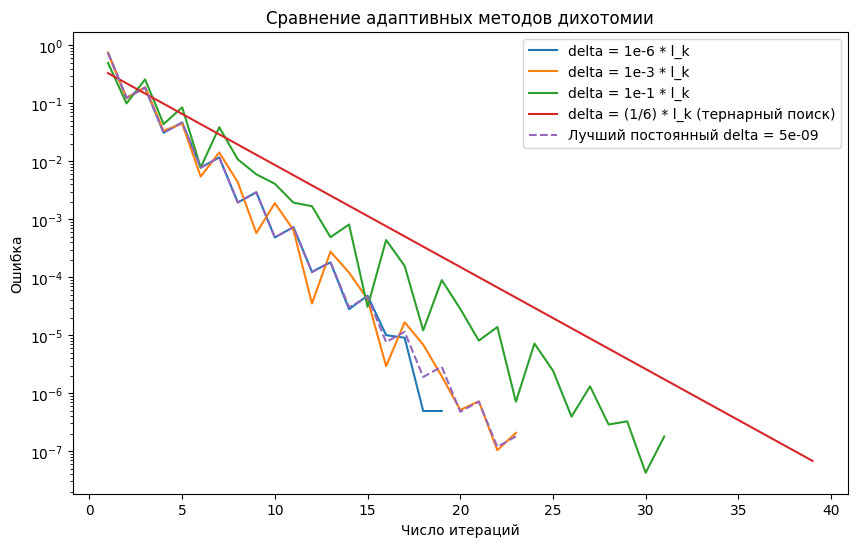

In [152]:
def delta_1(a, b):
    return 1e-6 * (b - a)

def delta_2(a, b):
    return 1e-3 * (b - a)

def delta_3(a, b):
    return 1e-1 * (b - a)

def delta_4(a, b):
    return (1/6) * (b - a)

best_const_delta = 1e-9 * (b - a)

adaptive_results = {}
for name, delta_func in [
    ('delta = 1e-6 * l_k', delta_1),
    ('delta = 1e-3 * l_k', delta_2),
    ('delta = 1e-1 * l_k', delta_3),
    ('delta = (1/6) * l_k (тернарный поиск)', delta_4)
]:
    c_out, history = dichotomy_adaptive(f, a, b, c_star, max_iter, epsilon, delta=delta_func)
    adaptive_results[name] = history

c_out, const_history = dichotomy_method(f, a, b, c_star, max_iter=max_iter, epsilon=epsilon, delta=best_const_delta)

plt.figure(figsize=(10, 6))
for name, history in adaptive_results.items():
    plt.semilogy(range(1, len(history) + 1), history, linestyle='-', label=name)
plt.semilogy(range(1, len(const_history) + 1), const_history, linestyle='--', label=f'Лучший постоянный delta = {best_const_delta:.0e}')

plt.xlabel('Число итераций')
plt.ylabel('Ошибка')
plt.title('Сравнение адаптивных методов дихотомии')
plt.legend()
plt.show()

__ё) (2 балла)__ Реализуйте метод __золотого сечения__. Для этого на каждой итерации подсчитываются точки $x_{1}, x_{2}$, симметричные относительно середины интервала и делящие исходный интервал в пропорции золотого сечения, то есть 1 к $\frac{1 + \sqrt{5}}{2}$. Обновления краевого значения происходит по аналогичной процедуре. 

In [153]:
def golden_ration_method(f, a, b, c_star, epsilon=1e-6):
    """
    Метод золотого сечения для поиска минимума унимодальной функции на интервале [a, b].

    Параметры:
        f (callable): Унимодальная функция, минимум которой ищется.
        a (float): Левая граница интервала поиска.
        b (float): Правая граница интервала поиска.
        c_star (float): Истинное значение точки минимума (для сравнения).
        epsilon (float, optional): Точность поиска. 
            Поиск завершается, когда длина интервала становится меньше epsilon. По умолчанию 1e-6.

    Возвращает:
        c (float): Приближенное значение точки минимума.
        history (list): Список значений |c - c_star| на каждой итерации.
    """
    
    if a >= b:
        raise ValueError("Левая граница интервала a должна быть меньше правой границы b.")
    if epsilon <= 0:
        raise ValueError("Точность epsilon должна быть положительной.")

    history = []

    golden_ratio = (1 + 5**0.5) / 2
    delta = 2 - golden_ratio
    
    left, right = a, b
    x1 = left + delta * (right - left)
    x2 = right - delta * (right - left)
    
    f_x1 = f(x1)
    f_x2 = f(x2)
    while right - left > epsilon:
        if f_x1 < f_x2:
            right = x2

            x2 = x1
            f_x2 = f_x1

            x1 = left + delta * (right - left)
            f_x1 = f(x1)
        else:
            left = x1

            x1 = x2
            f_x1 = f_x2

            x2 = right - delta * (right - left)
            f_x2 = f(x2)
        
        c_current = (left + right) / 2
        history.append(abs(c_current - c_star))
    
    c_out = (left + right) / 2
    return c_out, history

Постройте график сходимости.

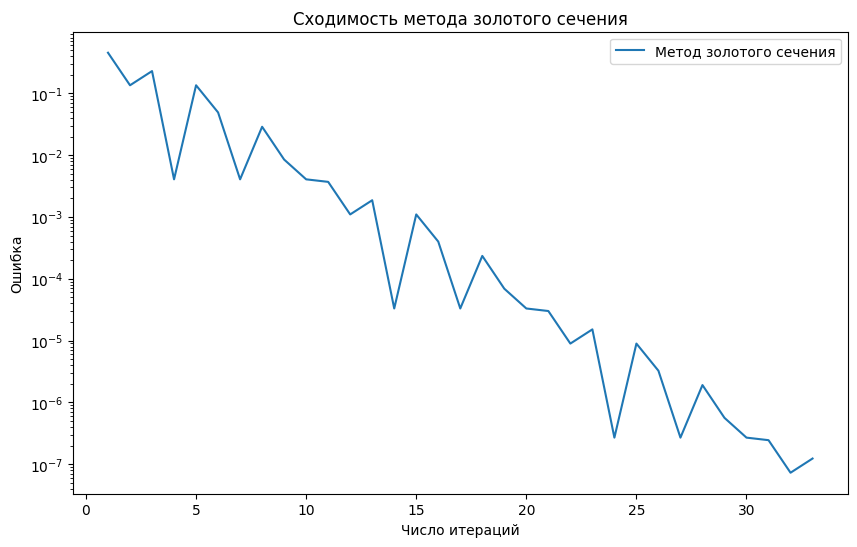

In [154]:
c_out, history = golden_ration_method(f, a, b, c_star, epsilon=epsilon)

plt.figure(figsize=(10, 6))
plt.semilogy(range(1, len(history) + 1), history, '-', label='Метод золотого сечения')
plt.xlabel('Число итераций')
plt.ylabel('Ошибка')
plt.title('Сходимость метода золотого сечения')
plt.legend()
plt.show()

__ж) (1.5 балла)__ Постройте сравнительные графики для методов ```dichotomy_method```, ```dichotomy_adaptive``` и ```golden_ratio_method``` для оптимальных значений параметра $\delta$. Первый график должен быть значением критерия от числа итераций.

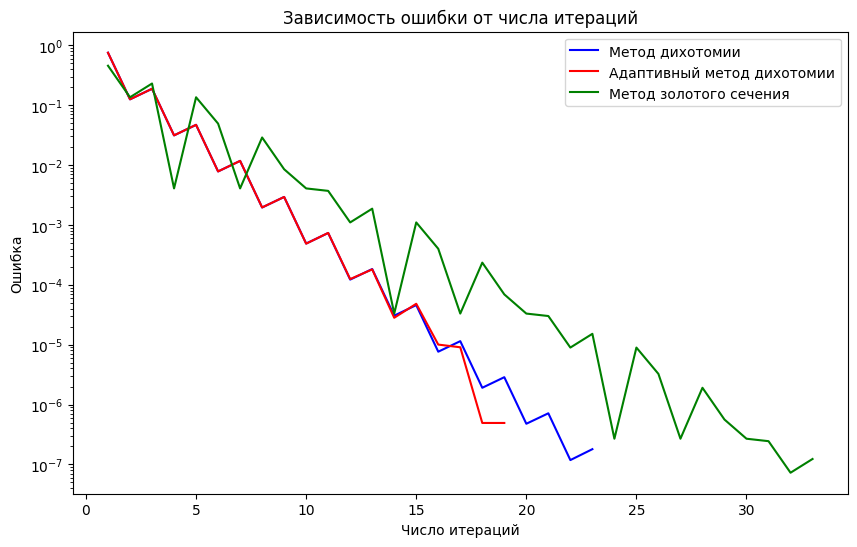

In [155]:
optimal_const_delta = 1e-9 * (b - a)

def optimal_adaptive_delta(a, b):
    return 1e-6 * (b - a)

c_out_dicho, history_dicho = dichotomy_method(f, a, b, c_star, max_iter=max_iter, epsilon=epsilon, delta=optimal_const_delta)
func_calls_dicho = [2 * (i + 1) for i in range(len(history_dicho))]

c_out_adapt, history_adapt = dichotomy_adaptive(f, a, b, c_star, max_iter=max_iter, epsilon=epsilon, delta=optimal_adaptive_delta)
func_calls_adapt = [2 * (i + 1) for i in range(len(history_adapt))]

c_out_gold, history_gold = golden_ration_method(f, a, b, c_star, epsilon=epsilon)
func_calls_gold = [2 + i for i in range(len(history_gold))]

plt.figure(figsize=(10, 6))
plt.semilogy(range(1, len(history_dicho) + 1), history_dicho, 'b-', label='Метод дихотомии')
plt.semilogy(range(1, len(history_adapt) + 1), history_adapt, 'r-', label='Адаптивный метод дихотомии')
plt.semilogy(range(1, len(history_gold) + 1), history_gold, 'g-', label='Метод золотого сечения')
plt.xlabel('Число итераций')
plt.ylabel('Ошибка')
plt.title('Зависимость ошибки от числа итераций')
plt.legend()
plt.show()

Второй - критерий от количества вызовов функции $f$.

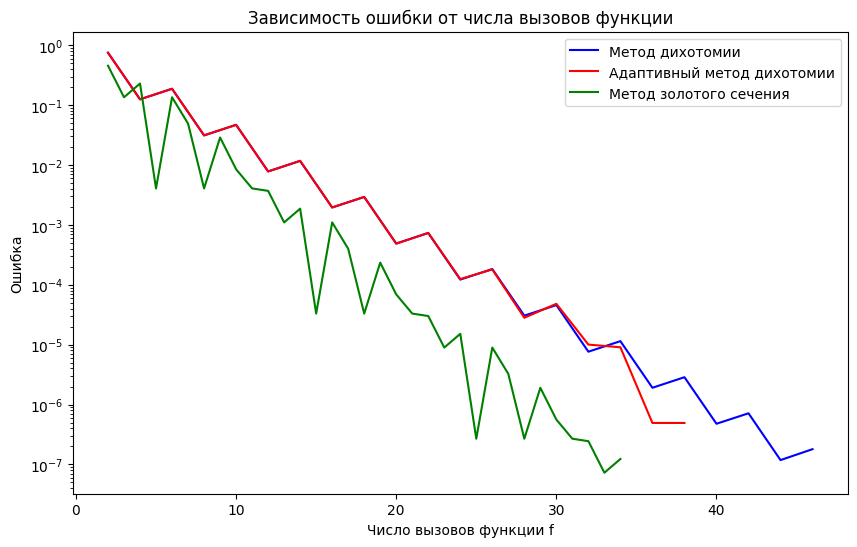

In [156]:
plt.figure(figsize=(10, 6))
plt.semilogy(func_calls_dicho, history_dicho, 'b-', label='Метод дихотомии')
plt.semilogy(func_calls_adapt, history_adapt, 'r-', label='Адаптивный метод дихотомии')
plt.semilogy(func_calls_gold, history_gold, 'g-', label='Метод золотого сечения')
plt.xlabel('Число вызовов функции f')
plt.ylabel('Ошибка')
plt.title('Зависимость ошибки от числа вызовов функции')
plt.legend()
plt.show()

Что можно сказать о применимости метода золотого сечения? В чем он лучше по сравнению с методом дихотомии? 

### Преимущества:

**Эффективность вычислений:** Метод золотого сечения требует только одного вычисления функции на каждой итерации, в то время как метод дихотомии требует двух вычислений на каждой итерации. Это означает, что метод золотого сечения более эффективен с точки зрения оракульной сложности.

**Отсутствие гиперпараметра $\delta$:** В методе золотого сечения нет необходимости подбирать оптимальное значение гиперпараметра $\delta$, как в методе дихотомии. Это делает метод более надежным и устойчивым.

### Недостатки:

**Скорость сужения интервала:** Метод золотого сечения сужает интервал медленнее, чем метод дихотомии. Интервал уменьшается примерно в 1.618 раз на каждой итерации, в то время как в методе дихотомии - примерно в 2 раза.